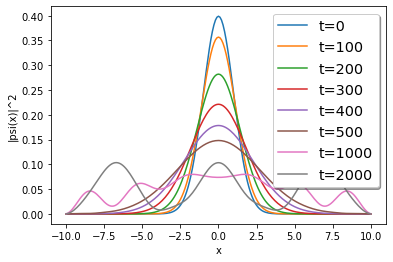

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

# create the x grid
dx = 0.1
x=np.arange(-10, 10+dx, dx)
N=len(x)

# create the intial wave packet
psi0 = np.exp(-x**2/4)/((2*np.pi)**(1/4))

# the potential is zero
V = np.zeros([N])

#https://en.wikipedia.org/wiki/Five-point_stencil
# construct the 4th(neigbhor,not dx**4) order FD maatrix
g = -5j/(4*dx**2) - 1j*V
a = 1j/(24*dx**2)


diag = np.diag(g)
off_diag1 = np.diag([16*a]*(N-1),1) + np.diag([16*a]*(N-1),-1)
off_diag2 = np.diag([-a]*(N-2),2) + np.diag([-a]*(N-2),-2)

M = diag + off_diag1 + off_diag2

# create the time grid
dt = 0.01
t = np.arange(0, 20+dt, dt)
steps = len(t)

# create anaray containing waavefunction for each step
y = np.zeros([steps,N],dtype=np.complex128)
y[0] = psi0

# the RK4 method
for i in range(0, steps-1):
    k1 = np.dot(M,y[i])
    k2 = np.dot(M,y[i] + k1*dt/2)
    k3 = np.dot(M,y[i] + k2*dt/2)
    k4 = np.dot(M,y[i] + k3*dt)
    y[i+1] = y[i]+dt*(k1 + 2*k2 + 2*k3 + k4)/6

for i in range(0, steps-1):
    k1 = np.dot(M,y[i])
    k2 = np.dot(M,y[i] + k1*dt/2)
    k3 = np.dot(M,y[i] + k2*dt/2)
    k4 = np.dot(M,y[i] + k3*dt)
    y[i+1] = y[i]+dt*(k1 + 2*k2 + 2*k3 + k4)/6

figure,axes = pyplot.subplots()
axes.plot(x,np.abs(y[0])**2, label='t=0')
axes.plot(x,np.abs(y[100])**2, label='t=100')
axes.plot(x,np.abs(y[200])**2, label='t=200')
axes.plot(x,np.abs(y[300])**2, label='t=300')
axes.plot(x,np.abs(y[400])**2, label='t=400')
axes.plot(x,np.abs(y[500])**2, label='t=500')
axes.plot(x,np.abs(y[1000])**2, label='t=1000')
axes.plot(x,np.abs(y[2000])**2, label='t=2000')
axes.legend(loc='upper right', shadow=True, fontsize='x-large')
axes.set_xlabel('x')
axes.set_ylabel('|psi(x)|^2')
pyplot.show()